# Нейро-ассистент на основе парсинга сайта

Для некоторых случаев можно сделать простой вариант нейро-консультанта на основе БЗ компании, полученной путем парсинга сайта.   Также нужно не забывать, что созданная таким образом база знаний не предполагает высокого качества ответов на вопросы пользователя из-за специфики сборки.

Данный подход можно использовать для быстрого изготовления пилотных вариантов проектов.

## Первый вариант - простой способ парсинга при помощи SitemapLoader

https://python.langchain.com/docs/integrations/document_loaders/sitemap

Обычно sitemap.xml располагается по стандартному адресу domain.com/sitemap.xml

**Как найти XML-Sitemap**

Несколько способов посмотреть карту сайта:

- В файле robots.txt. Пропишите в адресной строке: https://site.com/robots.txt. В самом файле, возможно, будет прописана директива XML-Sitemap в следующем формате: sitemap: https://site.com/sitemap.xml
- Если вы не смогли найти ссылку на файл в robots.txt, пропишите в адресной строке следующий запрос: https://site.com/sitemap.xml
💡 Если формат url для файла Robots.txt строго обязательный — /robots.txt, то url для файла Sitemap.xml может быть любым.

/sitemap.xml — просто более популярное название XML-карты, но оно может быть другим, например: /sitemap-categories.xml, /sitemap-en.xml и так далее.
- Также можно попробовать использовать https://www.seoptimer.com/sitemap-checker/


SitemapLoader загружает карту сайта по заданному URL-адресу, а затем очищает и загружает все страницы в карте сайта, возвращая каждую страницу как документ. SitemapLoader предоставляет набор методов для работы с картами сайта (sitemaps). Карты сайта – это специализированные XML-файлы, которые веб-мастера создают для поисковых роботов, чтобы лучше индексировать содержимое сайта.

**Методы этого класса:**

- aload()
Асинхронно загружает тексты по URL из web_path и преобразует их в объекты документов.
- fetch_all(urls)
Загружает все указанные URL одновременно, учитывая ограничения по скорости.
- lazy_load()
Выполняет "ленивую" загрузку текстов по URL, что означает отложенное считывание данных, когда это необходимо, не загружая всё сразу.
- load()
Загружает карту сайта и возвращает её в виде списка документов.
- load_and_split([text_splitter])
Загружает документы и разделяет их на части с использованием text_splitter.
Параметр: text_splitter – инструмент для разделения текста.
Возвращает: Список документов.
- parse_sitemap(soup)
Анализирует XML карты сайта и загружает данные в список словарей.
Параметр: soup – объект BeautifulSoup.
Возвращает: Список словарей.
- scrape([parser])
Извлекает данные со страницы и возвращает их, преобразованными с использованием BeautifulSoup.
Параметр: parser – выбор парсера для использования.
- scrape_all(urls[, parser])
Загружает все URL и возвращает объекты BeautifulSoup для каждого из них.
Параметры: urls – список URL; parser – выбор парсера для использования.
Возвращает: Список объектов BeautifulSoup.

In [ ]:
#@title Получение ключа API от пользователя

# импорт модулей
from google.colab import userdata # доступ к данным пользователя в Colab
import os                         # работа с переменными окружения

# получение ключа API от пользователя и установка его в переменной окружения
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [ ]:
#@title Загрузка страниц сайта

# установка библиотек
!pip install -q langchain_community==0.3.12 # расширения для LangChain

In [ ]:
# импорт модулей
os.environ["USER_AGENT"] = 'MyLangchainApp'                             # устанавливает переменную 'USER_AGENT'
from langchain_community.document_loaders.sitemap import SitemapLoader  # загрузка карт сайта
from langchain.text_splitter import RecursiveCharacterTextSplitter      # рекурсивное разделение текста
import nest_asyncio                                                     # исправляет баг с asyncio
nest_asyncio.apply()                                                    # применяет исправление для asyncio

# начальные значения
url = 'https://avangard-ocenka.ru/'       # адрес сайта
url_site_map = f'{url}/sitemap_index.xml' # получение url к файлу sitemap_index.xml

# объект для загрузки страниц
sitemap_loader = SitemapLoader(web_path=url_site_map)

# загрузка страниц
docs_loading = sitemap_loader.load()

# создаем экземпляр RecursiveCharacterTextSplitter, в данном случае, указываем сразу, на какие чанки мы желаем поделить наши тексты
text_splitter_instance = RecursiveCharacterTextSplitter(chunk_size = 4000, chunk_overlap  = 100)

# применение text_splitter к документам для разделения на чанки
docs = text_splitter_instance.split_documents(docs_loading)

Fetching pages: 100%|##########| 139/139 [01:22<00:00,  1.69it/s]


In [ ]:
#@title Смотрим, сколько чанков получилось
len(docs)

533

In [ ]:
#@title Для учебной задачи ограничимся 10-ю чанками
docs = docs[:10]

In [ ]:
#@title Выводим содержимое первого чанка
docs[0]

Document(metadata={'source': 'https://avangard-ocenka.ru/', 'loc': 'https://avangard-ocenka.ru/'}, page_content='Оценочная компания Авангард - Независимая экспертная оценка в Санкт-Петербурге\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nАкции\nПрайс\nО компании\nКонтакты\n \n\n\n\n\n\n\n\n\n\nАкции\nПрайс\nКонтакты\nО компании\n\n\n+7 (812) 425-33-42\nЗаказать звонок\n\n\n\nОценка недвижимости\n\nОценка квартиры для ипотеки\n\nОценка для Сбербанка\nОценка для ВТБ\nОценка для Альфа-Банка\nОценка для банка Санкт-Петербург\nОценка для Газпромбанка\nОценка для Домклик\nОценка для Райффайзен Банка\nОценка для банка Открытие\nОценка для другого банка\n\n\nОценка квартиры\n\nОценка стоимости доли в квартире\nОценка комнаты\nОценка квартиры для продажи\nОценка квартиры для опеки\n\n\nОценка коммерческой недвижимости\n\nОценка офиса\nОценка стоимости аренды\nОценка земель сельскохозяйственного назначения\nОценка сервитута и обременений\nОценка встроенных нежилых по

In [ ]:
#@title Определение количества токенов

# установка библиотек
!pip install -q tiktoken==0.8.0   # токенизация для моделей OpenAI

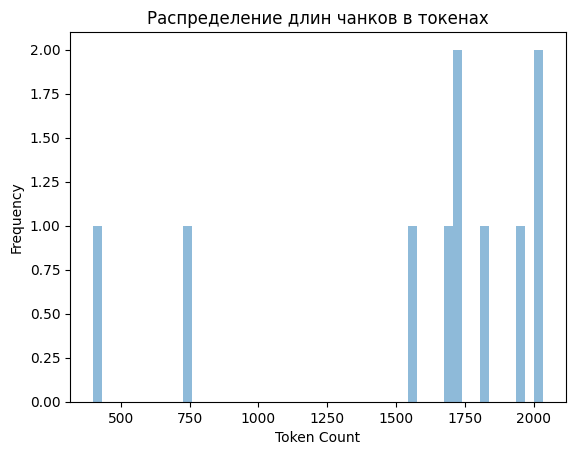

In [ ]:
# импорт модулей
import tiktoken                   # утилита для токенизации
import matplotlib.pyplot as plt   # построение графиков

# функция: возвращает количество токенов в строке
def num_tokens_from_string(string: str, encoding_name: str) -> int:
  encoding = tiktoken.get_encoding(encoding_name)
  num_tokens = len(encoding.encode(string))
  return num_tokens

# подсчет токенов для каждого фрагмента и построение графика
fragment_token_counts = [num_tokens_from_string(fragment.page_content, "cl100k_base") for fragment in docs]
plt.hist(fragment_token_counts, bins=50, alpha=0.5, label='Fragments')
plt.title('Распределение длин чанков в токенах')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#@title Инициализирум модель эмбеддингов

# установка библиотек
!pip install -q langchain_openai==0.2.12      # интеграция OpenAI в LangChain
!pip install -q faiss-cpu==1.9.0.post1        # поиск похожих векторов с использованием CPU

In [ ]:
#@title Инициализирум модель эмбеддингов

# импорт модулей
from langchain.vectorstores import FAISS      # хранилище векторов с FAISS
from langchain_openai import OpenAIEmbeddings # векторизация текстов

# создаем объект для векторизации
embeddings = OpenAIEmbeddings()

# создадим индексную базу из разделенных фрагментов текста
db = FAISS.from_documents(docs, embeddings)

In [ ]:
#@title Инструкция system
system = '''
  Очень подробно и детально ответь на вопрос пользователя,
  опираясь точно на документ с информацией для ответа клиенту.
  Не придумывай ничего от себя. Не ссылайся на сами отрывки документа
  с информацией для ответа, клиент о них ничего не должен знать
'''

In [ ]:
#@title Функция возвращает ответ модели на основе заданной темы.

# импорт модулей
from openai import OpenAI # работа с API OpenAI
import re                 # работа с регулярными выражениями

# функция
def answer_index(system, topic, search_index, temp=0, verbose=0) -> str:

    # находим наиболее релевантные вопросу пользователя чанки:
    docs = search_index.similarity_search(topic, k=6)
    message_content = re.sub(r'\n{2}', ' ', '\n '.join([f'\nОтрывок документа №{i+1}\n=====================' + doc.page_content + '\n' for i, doc in enumerate(docs)]))

    # если параметр verbose=1, то выводим релевантные чанки
    if verbose:
        print('message_content :\n', message_content)

    client = OpenAI()
    user = f"""
      Ответь на вопрос пользователя, но не упоминай данные тебе документы
      с информацией в ответе. Документ с информацией для ответа пользователю:
      {message_content}\n\nВопрос пользователя: \n{topic}
    """
    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": user}
    ]

    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        temperature=temp
    )

    return completion.choices[0].message.content

In [ ]:
#@title Выполнение запросов

# выполнение запроса
topic = 'Сколько стоит оценка ущерба квартире при затоплении соседями?'
ans = answer_index(system, topic, db, temp=0, verbose=0)
ans

'Стоимость оценки ущерба квартиры при затоплении соседями составляет от 5000 рублей. Эта услуга включает в себя проведение экспертизы, составление отчета о нанесенном ущербе и может быть выполнена как в бумажном, так и в электронном виде. Для получения более точной информации о стоимости и условиях услуги, рекомендуется обратиться к специалистам, которые смогут предоставить детальную консультацию.'

In [ ]:
# выполнение запроса
topic = 'Можно ли сделать оценку автомобиля за 1 день?'
ans = answer_index(system, topic, db, temp=0, verbose=0)
ans

'Оценка автомобиля может быть выполнена в течение одного дня, однако это зависит от нескольких факторов, таких как загруженность специалистов и наличие всех необходимых документов. Для того чтобы ускорить процесс, рекомендуется заранее подготовить все документы, подтверждающие право собственности на автомобиль, а также любые другие справки, которые могут потребоваться для оценки. \n\nЕсли вам нужно провести оценку в кратчайшие сроки, вы можете обратиться в специализированную компанию, где вам предложат услуги по оценке автомобиля с возможностью оперативного выполнения. Рекомендуется также уточнить возможность срочной оценки при обращении, чтобы получить точную информацию о сроках и стоимости услуги.'

In [ ]:
# выполнение запроса
topic = 'Сколько стоит оценка квартиры для продажи?'
ans = answer_index(system, topic, db, temp=0, verbose=0)
ans

'Стоимость оценки квартиры для продажи составляет от 3200 рублей. Однако, точная цена может варьироваться в зависимости от конкретных условий и требований. Рекомендуется связаться с нашей компанией для получения более детальной информации и уточнения стоимости в зависимости от ваших потребностей.'

## Второй вариант - парсинг определенных страниц сайта, очистка текста, нейро-консультант.

In [ ]:
#@title AsyncHtmlLoader загружает необработанный HTML код страниц из списка URL-адресов

# импорт модулей
from langchain.document_loaders import AsyncHtmlLoader  # импорт асинхронного загрузчика html-документов

# указываем конкретные странички для парсинга
urls = [
  'https://avangard-ocenka.ru/oczenka-nedvizhimosti/oczenka-dlya-ipoteki/',
  'https://avangard-ocenka.ru/ekspertiza/sudebnaya-stroitelno-tehnicheskaya/',
  'https://avangard-ocenka.ru/o-kompanii/'
]

# создание объекта загрузчика
loader = AsyncHtmlLoader(urls)

# загружаем текст
docs = loader.load()

Fetching pages: 100%|##########| 3/3 [00:02<00:00,  1.26it/s]


In [ ]:
#@title Каждая страничка - отдельный элемент
len(docs)

3

In [ ]:
#@title Посмотрим первый элемент
docs[0]

Document(metadata={'source': 'https://avangard-ocenka.ru/oczenka-nedvizhimosti/oczenka-dlya-ipoteki/', 'title': 'Оценка квартиры для ипотеки в Санкт-Петербурге и Ленинградской области', 'description': 'Поможем сделать оценку квартиры для ипотеки грамотно и быстро от 2500 р.. Лучшие специалисты с большим опытом. Обращайтесь к нам на сайте.', 'language': 'ru'}, page_content='<!DOCTYPE html>\n<html lang="ru">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<meta charset="UTF-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0">\n\n<link rel="preconnect" href="https://fonts.googleapis.com">\n<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>\n<link href="https://fonts.googleapis.com/css2?family=Roboto+Condensed:wght@700&family=Roboto:wght@300;400;500;700&display=swap" rel="stylesheet">\n<link rel="stylesheet" href="https://avangard

In [ ]:
#@title Трансформируем в текст

# установка библиотек
!pip install -q html2text==2024.2.26                              # конвертация HTML в текст

In [ ]:
# импорт модулей
from langchain.document_transformers import Html2TextTransformer  # импорт трансформера для преобразования html в текст

# создаем объект для трасформации в текст
html2text = Html2TextTransformer()

# трансформируем в текст
docs_transformed = html2text.transform_documents(docs)

# выводим текст первой странички
docs_transformed[0].page_content

'  * Акции\n  * Прайс\n  * О компании\n  * Контакты\n\n__\n\n  * Акции\n  * Прайс\n  * Контакты\n  * О компании\n\n+7 (812) 425-33-42\n\nЗаказать звонок\n\n  * __Оценка недвижимости\n    * Оценка квартиры для ипотеки\n      * Оценка для Сбербанка\n      * Оценка для ВТБ\n      * Оценка для Альфа-Банка\n      * Оценка для банка Санкт-Петербург\n      * Оценка для Газпромбанка\n      * Оценка для Домклик\n      * Оценка для Райффайзен Банка\n      * Оценка для банка Открытие\n      * Оценка для другого банка\n    * Оценка квартиры\n      * Оценка стоимости доли в квартире\n      * Оценка комнаты\n      * Оценка квартиры для продажи\n      * Оценка квартиры для опеки\n    * Оценка коммерческой недвижимости\n      * Оценка офиса\n      * Оценка стоимости аренды\n      * Оценка земель сельскохозяйственного назначения\n      * Оценка сервитута и обременений\n      * Оценка встроенных нежилых помещений\n      * Оценка отдельностоящего здания (комплекса зданий)\n    * Оспаривание кадастровой с

In [ ]:
#@title Почистим текст от мусора

# Функция для очистки текста
def clean_text(text):

  # удаление заголовков и подзаголовков
  text = re.sub(r"\* .+\n", "", text)

  # удаление разделительных линий и специальных символов
  text = re.sub(r"__+", "", text)

  # удаление ссылок и инструкций JavaScript
  text = re.sub(r"Нажимая кнопку .+\n", "", text)
  text = re.sub(r"Пожалуйста, включите JavaScript .+\n", "", text)

  # удаление строк типа "Оценка квартиры для [Название Банка] Подробнее"
  text = re.sub(r"Оценка квартиры для .+ Подробнее \n", "", text)

  # удаление строк, содержащих "Заказать звонок"
  text = re.sub(r".*Заказать звонок.*\n", "", text)

  # очистка текста от лишних пробелов и переводов строк
  text = re.sub(r"\n\s*\n", "\n", text)

  # возврат результата
  return text

# применение функции очистки к каждому документу в списке
for doc in docs_transformed:
  doc.page_content = clean_text(doc.page_content)

# посмотри очищенный текст
for doc in docs_transformed:
  print(doc.page_content)

        
+7 (812) 425-33-42
# Оценка квартиры для ипотеки
Главная страница » Оценка недвижимости » Оценка квартиры для ипотеки
Стоимость услуги от 3200 ₽
Заказать услугу
данных
Оценка квартиры для любого банка при покупке в ипотеку
—_ Аккредитованы в этом банке
Обратите внимание, что отчеты Авангард Оценочная компания подходят для всех
банков по первичному рынку жилья, вне зависимости от аккредитации.
«Авангард Оценочная компания» оказывает услуги независимой профессиональной
оценки рыночной стоимости недвижимости в Санкт-Петербурге и Ленинградской
области. Если вам требуется оценка недвижимости для ипотеки с гарантированным
результатом, то вы можете заказать наши услуги. Работаем в соответствии с
требованиями ипотечных банков и ФЗ-_135_  «Об оценочной деятельности».
## Когда необходима оценка недвижимости для ипотеки
Если ваша квартира в новостройке была куплена при помощи ипотечного
кредитования и на момент завершения строительства кредит еще не выплачен, то
вам потребуется оформить 

In [ ]:
#@title Разделение на чанки

# импорт модулей
from langchain.text_splitter import MarkdownHeaderTextSplitter

# параметры разметки
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
    ("####", "Header 4")

]

# разделение на чанки
markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on, strip_headers=False)

# получение фрагментов
chunks = []
for doc in docs_transformed:
  fragments = markdown_splitter.split_text(doc.page_content)
  chunks.extend(fragments)

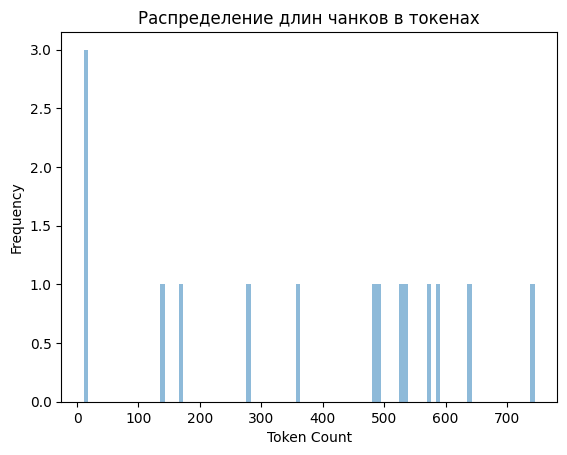

In [ ]:
#@title Подсчет количества токенов

fragment_token_counts = [num_tokens_from_string(fragment.page_content, "cl100k_base") for fragment in chunks]
plt.hist(fragment_token_counts, bins=100, alpha=0.5, label='Fragments')
plt.title('Распределение длин чанков в токенах')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#@title Посмотрим первые два чанка

chunks[:2]

[Document(metadata={}, page_content='+7 (812) 425-33-42'),
 Document(metadata={'Header 1': 'Оценка квартиры для ипотеки'}, page_content='# Оценка квартиры для ипотеки\nГлавная страница » Оценка недвижимости » Оценка квартиры для ипотеки\nСтоимость услуги от 3200 ₽\nЗаказать услугу\nданных\nОценка квартиры для любого банка при покупке в ипотеку\n—_ Аккредитованы в этом банке\nОбратите внимание, что отчеты Авангард Оценочная компания подходят для всех\nбанков по первичному рынку жилья, вне зависимости от аккредитации.\n«Авангард Оценочная компания» оказывает услуги независимой профессиональной\nоценки рыночной стоимости недвижимости в Санкт-Петербурге и Ленинградской\nобласти. Если вам требуется оценка недвижимости для ипотеки с гарантированным\nрезультатом, то вы можете заказать наши услуги. Работаем в соответствии с\nтребованиями ипотечных банков и ФЗ-_135_  «Об оценочной деятельности».')]

In [ ]:
#@title Создаем индексную базу

# инициализаируем модель эмбеддингов
embeddings = OpenAIEmbeddings()

# cоздадим индексную базу из разделенных фрагментов текста
db_2 = FAISS.from_documents(chunks, embeddings)

In [ ]:
#@title Формируем system

system = """
  Очень подробно и детально ответь на вопрос пользователя,
  опираясь точно на документ с информацией для ответа клиенту.
  Не придумывай ничего от себя. Не ссылайся на сами отрывки документа
  с информацией для ответа, клиент о них ничего не должен знать.
"""

In [ ]:
#@title Функция возвращает ответ модели на основе заданной темы.
def answer_index(system, topic, search_index, temp=0, verbose=0) -> str:

  # находим наиболее релевантные вопросу пользователя чанки:
  docs = search_index.similarity_search(topic, k=6)
  message_content = re.sub(r'\n{2}', ' ', '\n '.join([f'\nОтрывок документа №{i+1}\n=====================' + doc.page_content + '\n' for i, doc in enumerate(docs)]))

  # если параметр verbose=1, то выводим релевантные чанки
  if verbose:
      print('message_content :\n', message_content)

  # инициализируем модель OpenAI
  client = OpenAI()

  # формирование промпта
  user = f"""
    Ответь на вопрос пользователя, но не упоминай данные тебе документы с информацией в ответе.
    Документ с информацией для ответа пользователю: {message_content}\n\nВопрос пользователя: \n{topic}
  """
  messages = [
      {"role": "system", "content": system},
      {"role": "user", "content": user}
  ]

  # выполнение запроса
  completion = client.chat.completions.create(
      model="gpt-4o-mini",
      messages=messages,
      temperature=temp
  )

  # возврат результата
  return completion.choices[0].message.content

In [ ]:
#@title Выполнение запросов

# выполнение запроса
topic = 'Возможна ли доставка печатной версии отчета?'
ans=answer_index(system, topic, db_2, temp=0, verbose=0)
ans

'Да, доставка печатной версии отчета возможна. Если вам потребуется отчет на бумажном носителе, он будет подготовлен, пронумерован постранично, прошит, подписан оценщиком и скреплен печатью компании. Вы можете обсудить детали получения отчета с менеджером компании.'

In [ ]:
# выполнение запроса
topic = 'Какие документы я должен вам представить для проведения судебной строительно-технической экспертизы?'
ans=answer_index(system, topic, db_2, temp=0, verbose=0)
ans

'Для проведения судебной строительно-технической экспертизы вам потребуется предоставить определённый пакет документов, который зависит от типа жилья. \n\nЕсли вы обращаетесь по поводу первичного жилья в новостройке, вам понадобятся следующие документы:\n1. Паспортные данные (ФИО, адрес регистрации, паспортные данные, включая код подразделения и дату выдачи паспорта).\n2. Документ о покупке квартиры (например, договор долевого участия, договор первого взноса или договор купли-продажи).\n3. План квартиры (можно предоставить план по фактическому обмеру, выписку из ЕГРН или план от застройщика).\n4. Акт приемки-передачи квартиры (выдается после приемки квартиры).\n\nЕсли речь идет о вторичном жилье, вам нужно будет предоставить:\n1. Паспортные данные (аналогично первичному жилью).\n2. Документ, подтверждающий право собственности (свидетельство или выписка из Росреестра и кадастровый паспорт).\n3. Технический паспорт.\n\nПосле согласования, документы могут быть переданы в копиях на осмотре

# Система с несколькими базами знаний

## Загрузка базы знаний из нескольких pdf:

Если есть необходимость создать базу знаний из нескольких pdf, это можно сделать вот так:

Ссылки на pdf:

https://www.toyotakz.com/content/dam/toyota/nmsc/kazakhstan/cross-model/new-cars/ru/pricelists/july-2023/Corolla_Rus_June_2023_new.pdf

https://www.toyotakz.com/content/dam/toyota/nmsc/kazakhstan/cross-model/new-cars/ru/brochures/broshura_corolla.pdf

https://www.toyotakz.com/content/dam/toyota/nmsc/kazakhstan/cross-model/new-cars/ru/pricelists/may-2023/LCPrado.pdf

В данной задаче мы возьмем 2 pdf документа и соединим их в 1 БЗ (по модели Королла)

In [ ]:
#@title Функция скачивает pdf-файл и сохраняет его

# импорт модулей
import requests

# функция принимает URL PDF-файла и путь, по которому файл будет сохранен в файловой системе Colab
# она скачивает файл и сохраняет его, если HTTP-запрос успешен
def download_pdf_from_url(url, save_path):
    response = requests.get(url)

    if response.status_code == 200:
        with open(save_path, 'wb') as f:
            f.write(response.content)
        print(f"PDF downloaded and saved as {save_path}")
    else:
        print(f"Failed to download PDF. HTTP Status Code: {response.status_code}")

PDF downloaded and saved as /content/Corolla_Rus_June_2023_new.pdf


In [ ]:
#@title Загрузка Corolla_Rus_June_2023_new.pdf
url = "https://www.toyotakz.com/content/dam/toyota/nmsc/kazakhstan/cross-model/new-cars/ru/pricelists/july-2023/Corolla_Rus_June_2023_new.pdf"
save_path = "/content/Corolla_Rus_June_2023_new.pdf"
download_pdf_from_url(url, save_path)

PDF downloaded and saved as /content/Corolla_Rus_June_2023_new.pdf


In [ ]:
#@title Загрузка broshura_corolla.pdf
url = "https://www.toyotakz.com/content/dam/toyota/nmsc/kazakhstan/cross-model/new-cars/ru/brochures/broshura_corolla.pdf"
save_path = "/content/broshura_corolla.pdf"
download_pdf_from_url(url, save_path)

PDF downloaded and saved as /content/broshura_corolla.pdf


In [ ]:
#@title Парсинг PDF

# установка библиотек
!pip install PyMuPDF==1.25.1  # работа с документами в формате PDF

In [ ]:
# импорт модулей
import fitz # работа с документами в формате PDF

# функция, которая принимает список названий PDF-файлов и возвращает базу знаний FAISS
def create_faiss_vectorstore(pdf_names):
    pdf_folder_path = "/content/"

    # Фильтрация файлов: загрузка только файлов с определенными именами и расширением .pdf
    all_files = os.listdir(pdf_folder_path)
    pdf_files = [fn for fn in all_files if fn in pdf_names and fn.endswith('.pdf')]

    all_documents = []
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=800, chunk_overlap=100, length_function=len)

    for pdf_file in pdf_files:
        pdf_path = os.path.join(pdf_folder_path, pdf_file)

        # Извлечение текста из PDF
        try:
            with fitz.open(pdf_path) as pdf:
                text = ""
                for page in pdf:
                    text += page.get_text()
        except Exception as e:
            print(f"Ошибка при обработке файла {pdf_file}: {e}")
            continue

        # Разделение текста на части
        documents = text_splitter.split_text(text)
        all_documents.extend(documents)

    # Создание FAISS vectorstore
    embeddings = OpenAIEmbeddings()
    vectorstore = FAISS.from_texts(all_documents, embeddings).as_retriever()

    return all_documents, vectorstore

In [ ]:
#@title Создадим базу знаний по автомобилю Тойота Королла на основе спецификаций в формате pdf
pdf_names = ['Corolla_Rus_June_2023_new.pdf', 'broshura_corolla.pdf']
text_DB, db_corolla = create_faiss_vectorstore(pdf_names)

In [ ]:
# можно посмотреть, какую информацию содержит наша БЗ
text_DB

['TOYOTA COROLLA\n2\nТВОЯ \nАБСОЛЮТНО \nНОВАЯ COROLLA\nАБСОЛЮТНО НОВАЯ \nTOYOTA COROLLA\nСамый продаваемый автомобиль в \nмире стал еще более привлекательным.  \nБлагодаря совершенно новому подходу \nк дизайну и проектированию Corolla \nпереродилась став еще более динамичной \nи увлекательной. Стильный новый внешний \nвид соответствует ее энергичности, в \nто время как обновленные технологии \nгарантируют, что Corolla лучше, чем когда-\nлибо прежде.\n3\n4\nТЕХНИЧЕСКИЕ \nХАРАКТЕРИСТИКИ ДВИГАТЕЛЯ\nСОЗДАН ДАРИТЬ \nУДОВОЛЬСТВИЕ\nВЫСОКУЮ  \n\u200a\u200a\u200aПРОИЗВОДИТЕЛЬНОСТЬ\nМЫ ГАРАНТИРУЕМ \nБЕНЗИНОВЫЙ ДВИГАТЕЛЬ\n1,6-литровый бензиновый \nдвигатель 6 MT\nМощность \n122 л.с. по DIN \nРасход топлива*\n6.6 л/100 км \nВыбросы CO2*\n157 г/км \nРазгон 0-100 км/ч\n11 секунд\n1,6-литровый бензиновый \nдвигатель CVT\nМощность \n122 л.с. по DIN',
 'Разгон 0-100 км/ч\n11 секунд\n1,6-литровый бензиновый \nдвигатель CVT\nМощность \n122 л.с. по DIN \nРасход топлива*\n6.4 л/100 км \nВыбросы CO2*\n150 г

**Динамический выбор из нескольких баз знаний - "ретриверов" (векторных хранилищ)**

Создание цепочки, которая динамически выбирает, какую поисковую систему использовать. В частности, мы покажем, как использовать MultiRetrievalQAChain для создания цепочки вопросов-ответов, которая выбирает цепочку поиска QA (вопрос-ответ), наиболее подходящую для данного вопроса, а затем отвечает на вопрос, используя ее.

In [ ]:
#@title Создадим базу знаний еще и по модели Land Cruiser Prado из pdf
url = 'https://www.toyotakz.com/content/dam/toyota/nmsc/kazakhstan/cross-model/new-cars/ru/pricelists/may-2023/LCPrado.pdf'
save_path = '/content/LandCruiser.pdf'
download_pdf_from_url(url, save_path)

PDF downloaded and saved as /content/LandCruiser.pdf


In [ ]:
# создаем базу знаний faiss по LandCruiser
pdf_names = ['LandCruiser.pdf']
text_db_Landcruiser, db_LandCruiser = create_faiss_vectorstore(pdf_names)

In [ ]:
# посмотрим содержимое базы знаний
text_db_Landcruiser

['Максимальная цена перепродажи \nна автомобили, произведенные с \nянваря 2023г., тг.1 \nЦены действительны с 1 марта \n2023 года до следующего \nизменения\nТЕРРА\n(5 МЕСТ)\nКОМФОРТ\n(5 МЕСТ)\nКОМФОРТ+\n(7 МЕСТ)\nПРЕСТИЖ\n(7 МЕСТ)\nПРЕСТИЖ \nBLACK EDITION\n(7 МЕСТ)\nПРЕСТИЖ BLACK \nEDITION 4.0\n(5 МЕСТ)\nЛЮКС\n(7 МЕСТ)\n24 110 000\n28 330 000\n30 710 000\n33 390 000\n33 390 000\n39 910 000\n43 780 000\nДвигатель\n2.7 л бензиновый VVT-i, цепной привод\n4.0 л бензиновый \nDual VVT-i,\nцепной привод\nТип двигателя\n4-цилиндровый, рядный, 16 клапанный DOHC\n 6-цилиндровый, \nV-образный,\n24 клапанный DOHC\nМаксимальная мощность\n120 кВт (163 л.с.) при 5200 об/мин\n183 кВт (249 л.с.)\nпри 5600 об/мин\nМаксимальный крутящий момент\n246 Н∙м при 3900 об/мин\n381 Н∙м при 4400 об/мин\nКоробка передач\n5-МКП\n6-АКП\nМаксимальная скорость (км/ч)\n165',
 '381 Н∙м при 4400 об/мин\nКоробка передач\n5-МКП\n6-АКП\nМаксимальная скорость (км/ч)\n165\n160\n175\nРазгон 0-100 км/ч (сек)\n13.8\n13.9\n–\nРасх

Таким образом, у нас имеются 2 разные базы знаний faiss: одна по Corolla, вторая по LandCruiser

In [ ]:
#@title Добавляем информацию и описание для наших векторных хранилищ (баз знаний)

retriever_infos = [
    {
        "name": "TOYOTA COROLLA",
        "description": "Suitable for answering questions about TOYOTA COROLLA cars",  # описываем, для каких вопросов применять данную БЗ
        "retriever": db_corolla
    },
    {
        "name": "Land Cruiser Prado",
        "description": "Suitable for answering questions about TOYOTA Land Cruiser Prado cars", # описываем, для каких вопросов применять данную БЗ
        "retriever": db_LandCruiser
    }
]

In [ ]:
#@title Формируем system

system = """
  Очень подробно и детально ответь на вопрос пользователя,
  опираясь точно на документ с информацией для ответа клиенту.
  Не придумывай ничего от себя. Не ссылайся на сами отрывки документа
  с информацией для ответа, клиент о них ничего не должен знать.
"""

In [ ]:
#@title MultiRetrievalQAChai

# импорт модулей
from langchain_openai import ChatOpenAI                   # класс ChatOpenAI
from langchain.prompts import PromptTemplate              # шаблона запроса
from langchain.chains import LLMChain                     # цепочка LLM
from langchain.chains.router import MultiRetrievalQAChain # Импорт многократного поиска

# определяем модель
llm = ChatOpenAI(temperature=0)

# шаблон для запроса
prompt = PromptTemplate(input_variables=["query"], template="Question: {query}")

# цепочка, которую будем использовать по умолчанию
default_chain_llm = LLMChain(llm=llm, prompt=prompt)

# создание MultiRetrievalQAChain с указанием default_chain_llm
chain = MultiRetrievalQAChain.from_retrievers(
  llm=llm,
  retriever_infos=retriever_infos,
  default_chain_llm=default_chain_llm,
  verbose=True
)

/usr/local/lib/python3.10/dist-packages/pydantic/main.py:212: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  validated_self = self.__pydantic_validator__.validate_python(data, self_instance=self)


In [ ]:
#@title Запрос по модели Тойота Королла

# Запускаем на вопросе из раздела по модели Тойота Королла (в промежуточных итогах видим, что выбрана база знаний тойота королла)
print(chain.invoke("Какая максимальная скорость королла КОМФОРТ(МТ)?")["result"])



> Entering new MultiRetrievalQAChain chain...
TOYOTA COROLLA: {'query': 'Какая максимальная скорость королла КОМФОРТ(МТ)?'}
> Finished chain.
Максимальная скорость для модели Toyota Corolla КОМФОРТ (МТ) составляет 195 км/ч.


In [ ]:
#@title Запросы по модели Land Cruiser

# задаем вопрос, на основе вопроса выбирается необходимая БЗ
print(chain.invoke("Какой разгон 0-100 км/ч (сек) у Land Cruiser?")["result"])



> Entering new MultiRetrievalQAChain chain...
Land Cruiser Prado: {'query': 'Какой разгон 0-100 км/ч (сек)  у Land Cruiser Prado?'}
> Finished chain.
У Land Cruiser Prado разгон 0-100 км/ч составляет 13.8 секунд.


In [ ]:
# задаем вопрос, на основе вопроса выбирается необходимая БЗ
print(chain.invoke("Какой Тип двигателя у Land Cruiser?")["result"])



> Entering new MultiRetrievalQAChain chain...
Land Cruiser Prado: {'query': 'Какой Тип двигателя у Land Cruiser Prado?'}
> Finished chain.
Land Cruiser Prado имеет два типа двигателей:
1. 2.7 л бензиновый VVT-i, цепной привод
2. 4.0 л бензиновый Dual VVT-i, цепной привод
